## Penguins
- Adelie, Gentoo 구분

In [15]:
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

df = sns.load_dataset('penguins')

# df['bill_length_mm'] = df['bill_length_mm'].fillna(df['bill_length_mm'].mean())
# df['flipper_length_mm'] = df['flipper_length_mm'].fillna(df['flipper_length_mm'].mean())
df.dropna(inplace = True)
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


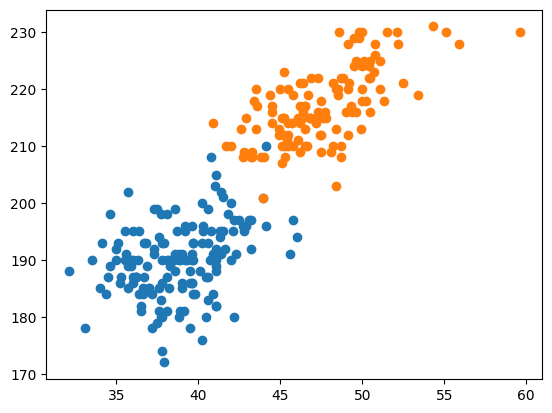

In [90]:
con1 = df['species'] == 'Adelie'
con2 = df['species'] == 'Gentoo'

p = df.loc[con1]
p1 = df.loc[con2]
plt.scatter(p['bill_length_mm'], p['flipper_length_mm'])
plt.scatter(p1['bill_length_mm'], p1['flipper_length_mm'])

In [16]:
con = df['species'].isin(['Adelie', 'Gentoo'])
p_data = df.loc[con, ['bill_length_mm', 'flipper_length_mm']]
p_target = df.loc[con, ['species']]

In [17]:
train_input, test_input, train_target, test_target = train_test_split(p_data, p_target)

In [21]:
mean = train_input.mean()
std = train_input.std()
train_scaled = (train_input - mean) / std

In [22]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_scaled, train_target['species'])

KNeighborsClassifier()

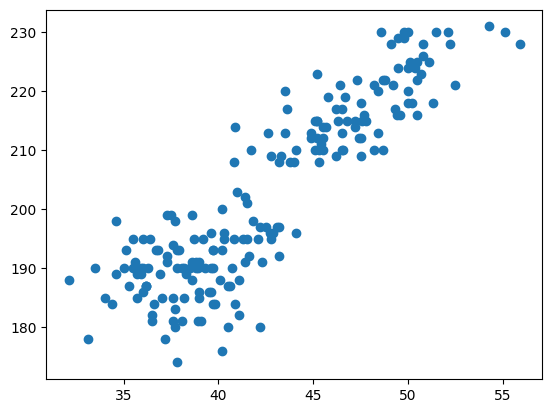

In [23]:
plt.scatter(train_input['bill_length_mm'], train_input['flipper_length_mm'])

In [26]:
test_scaled = (test_input - mean) / std
kn.score(test_scaled, test_target['species'])

1.0